Reorder data in two-parameter bifurcation diagrams

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# CGL forced

## 1:1

In [79]:
fname1 = 'cgl1_f_h11_2par'
fname2 = '.dat'
fname = fname1+fname2

In [20]:
dat = np.loadtxt(fname)

In [21]:
print(dat[:10,0])

[ 0.0259155  -0.00289993  0.0259155   0.05898     0.0795761   0.101743
  0.122713    0.142532    0.162269    0.183098  ]


In [48]:
# get places where data is disjoint
def get_disjoint_idx(dat,dx=.1,dy=.1):
    """
    assume write points data (not allpts data) from XPP, no oscillations
    """
    x_idx = np.where(np.abs(np.diff(dat[:,0]))>dx)
    y_idx = np.where(np.abs(np.diff(dat[:,1]))>dy)
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.diff(dat[:,0]),label='x diff')
    axs.plot(np.diff(dat[:,1]),label='y diff')
    axs.legend()
    plt.show()
    return x_idx[0],y_idx[0]

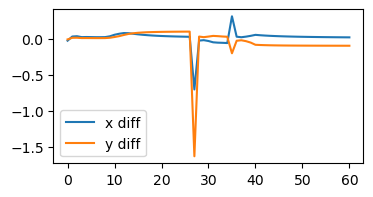

In [49]:
x_idxs, y_idxs = get_disjoint_idx(dat)

In [51]:
print(x_idxs,y_idxs)

[27 35] [27 35]


In [58]:
disjoint_curves = []
disjoint_curves.append(dat[:x_idxs[0],:2])
disjoint_curves.append(dat[x_idxs[0]:x_idxs[1],:2])
disjoint_curves.append(dat[x_idxs[1]:,:2])

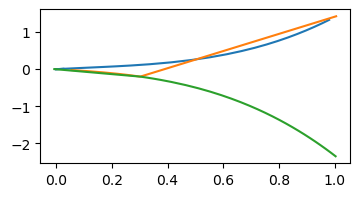

In [69]:
fig,axs = plt.subplots(figsize=(4,2))
axs.plot(disjoint_curves[0][:,0],disjoint_curves[0][:,1])
axs.plot(disjoint_curves[1][:,0],disjoint_curves[1][:,1])
axs.plot(disjoint_curves[2][:,0],disjoint_curves[2][:,1])

Remove middle branch. Not sure where that came from

For these datasets, I'd like to plot them transposed.

Since the blue branch is plotted from low x to high x, we need to flip it.

The second (green) branch can be kept the same.

In [71]:
new = np.zeros([len(disjoint_curves[0]) + len(disjoint_curves[2]),2])

In [75]:
# save first with data and axes flipped
new[:len(disjoint_curves[0]),0] = disjoint_curves[0][:,1][::-1]
new[:len(disjoint_curves[0]),1] = disjoint_curves[0][:,0][::-1]

In [77]:
# save next branch with only axes flipped
new[len(disjoint_curves[2]):,0] = disjoint_curves[2][:,1]
new[len(disjoint_curves[2]):,1] = disjoint_curves[2][:,0]

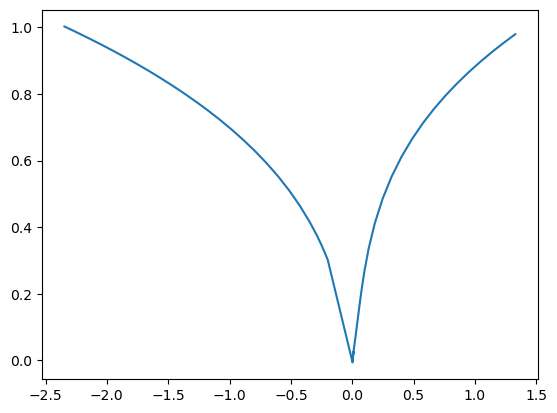

In [83]:
fig,axs = plt.subplots()
axs.plot(new[:,0][::-1],new[:,1][::-1])

In [85]:
np.savetxt(fname1+'_fixed'+fname2,new[::-1,:])